In [ ]:
# pip install seaborn --upgrade

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline 

In [3]:
data = r"amz_uk_price_prediction_dataset.csv"
amz_data = pd.read_csv(data)

In [4]:
amz_data.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [5]:
crosstab_results = pd.crosstab(amz_data["category"], amz_data["isBestSeller"])

In [6]:
crosstab_results.sort_values(by=True, ascending=False)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [7]:
crosstab_results[crosstab_results[True]>crosstab_results[False]]

isBestSeller,False,True
category,,


In [8]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_results)
chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [9]:
round(association(crosstab_results, method="cramer"),3)

0.122

<Figure size 1000x600 with 0 Axes>

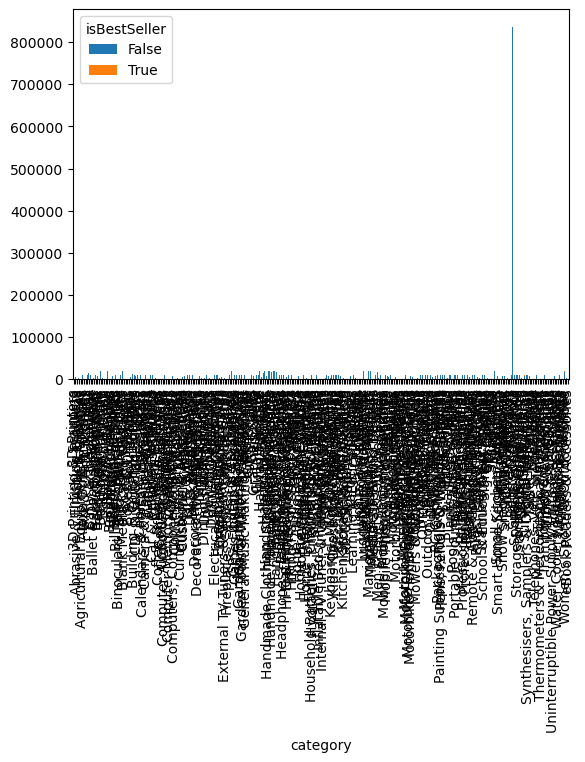

<Figure size 1000x600 with 0 Axes>

In [10]:
crosstab_results.plot(kind="bar", stacked=True)
plt.figure(figsize=(10,6))

In [11]:
low_q = amz_data["price"].quantile(0.25)
high_q = amz_data["price"].quantile(0.75)
IQR = high_q - low_q

In [12]:
pot_outliers = amz_data[(amz_data["price"]>high_q+1.5*IQR) | (amz_data["price"]<low_q-1.5*IQR)]
data_removed = amz_data[~amz_data.isin(pot_outliers)]

In [13]:
head20 = data_removed.groupby(["category"])["price"].count().sort_values(ascending=False).head(20).to_frame()
head20 = data_removed[data_removed["category"].isin(head20.index)]
head10 = data_removed.groupby(["category"])["price"].count().sort_values(ascending=False).head(10).to_frame()
head10 = data_removed[data_removed["category"].isin(head10.index)]

<Axes: xlabel='price', ylabel='category'>

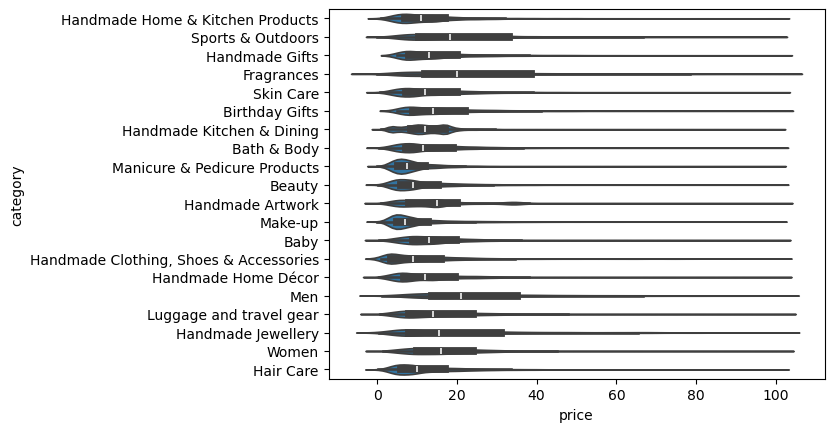

In [14]:
sns.violinplot(head20, x="price", y="category")

In [15]:
# head20.groupby(["category"])["price"].median().sort_values(ascending=False)

In [16]:
head10_means = head10.groupby(["category"])["price"].mean().to_frame()

<Axes: xlabel='category', ylabel='price'>

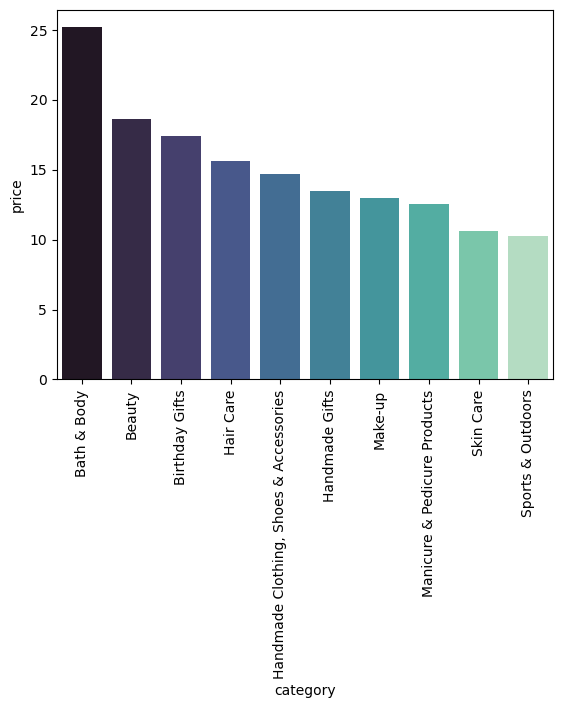

In [17]:
plt.xticks(rotation=90)
sns.barplot(head10_means.sort_values(by="price", ascending=False), x=head10_means.index, y="price", palette="mako")

<Axes: xlabel='category', ylabel='stars'>

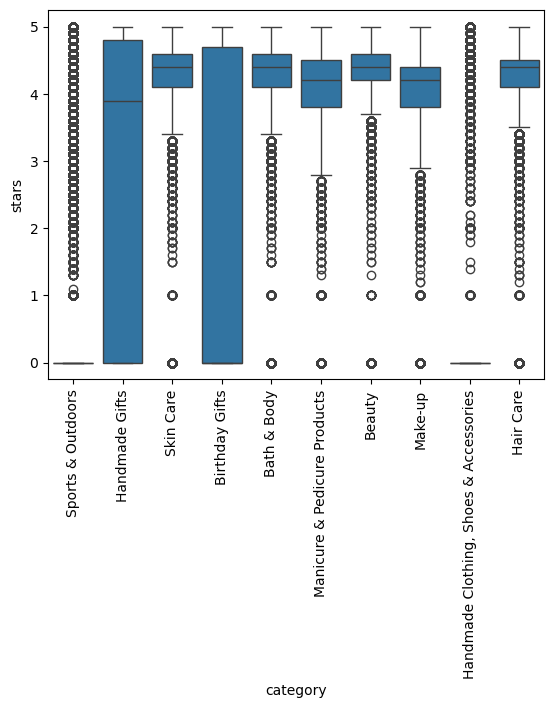

In [18]:
plt.xticks(rotation=90)
sns.boxplot(head10, x="category", y="stars")

In [19]:
correlation = data_removed["price"].corr(data_removed["stars"])
correlation.round(3)

-0.078

**There is no relevant correlation**

<Axes: xlabel='stars', ylabel='price'>

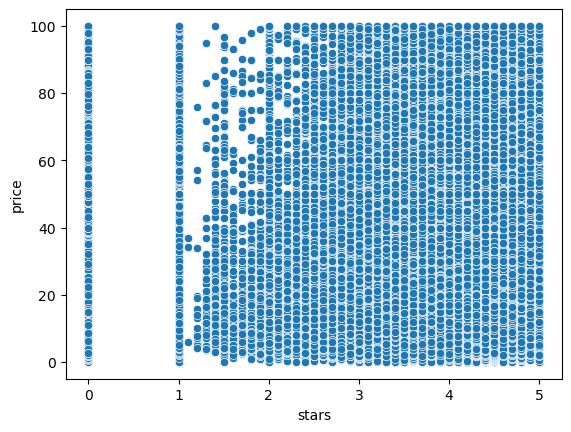

In [20]:
sns.scatterplot(data_removed, x="stars", y="price")

In [21]:
data_numerical = data_removed.select_dtypes("number")
correlation_matrix = data_numerical.corr()

<Axes: >

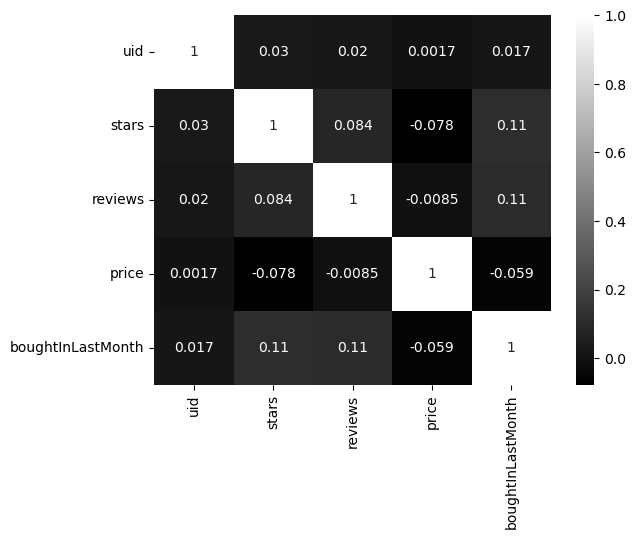

In [22]:
sns.heatmap(correlation_matrix, annot=True, cmap="gray")

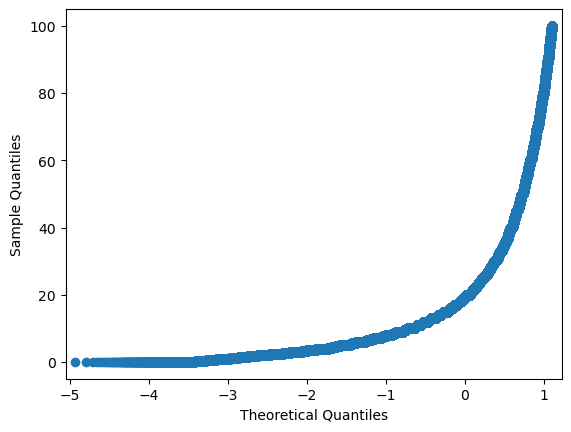

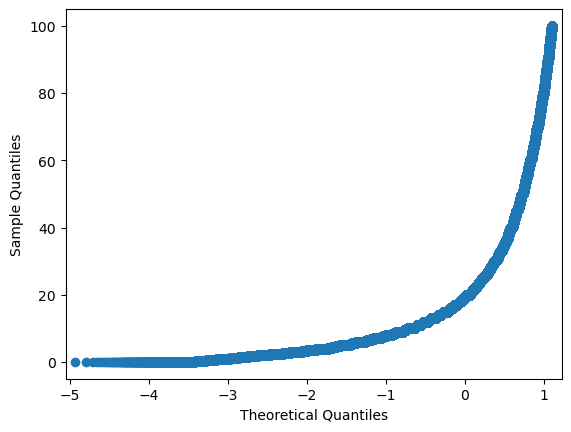

In [26]:
sm.qqplot(data_removed["price"], line="s")